In [1]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class CustomDataset(Dataset):
    # 초기 데이터 생성 방법 지정
    def __init__(self, text, labels):
        self.labels = labels
        self.data = text
    
    # 데이터의 전체 길이
    def __len__(self):
        return len(self.labels)

    # index 값을 주었을 때 반환되는 데이터의 형태
    def __getitem__(self, idx):
        label = self.labels[idx]
        text = self.data[idx]
        sample = {"Text":text, "Class":label}
        return sample

In [2]:
text = ['Happy', 'Amazing', 'Sad', 'Unhappy', 'Glum']
labels = ['Positive', 'Positive', 'Nagative', 'Nagative', 'Nagative']
MyDataset = CustomDataset(text, labels)

In [3]:
MyDataLoader = DataLoader(MyDataset, batch_size=2, shuffle=True)
next(iter(MyDataLoader))

{'Text': ['Unhappy', 'Amazing'], 'Class': ['Nagative', 'Positive']}

In [4]:
for dataset in MyDataLoader:
    print(dataset)

{'Text': ['Unhappy', 'Sad'], 'Class': ['Nagative', 'Nagative']}
{'Text': ['Happy', 'Glum'], 'Class': ['Positive', 'Nagative']}
{'Text': ['Amazing'], 'Class': ['Positive']}


### NotMINST

In [5]:
from torchvision.datasets import VisionDataset
from typing import Any, Callable, Dict, List, Optional, Tuple

from tqdm import tqdm
import os, sys
from pathlib import Path

from skimage import io, transform
import matplotlib.pyplot as plt

In [43]:
import tarfile
import requests

class NotMNIST(VisionDataset):
    resource_url = "http://yaroslavvb.com/upload/notMNIST/notMNIST_large.tar.gz"

    def __init__(self,
                 root:str,
                 train:bool = True,
                 transform:Optional[Callable] = None,
                 target_transform:Optional[Callable] = None,
                 download:bool = False,
                 ) -> None:
        super(NotMNIST, self).__init__(root, transform=transform,
                                        target_transform=target_transform)

        if not self._check_exists():
            self.download()

        if download:
            self.download()

        self.data, self.target = self._load_data()

    
    def __len__(self) -> int:
        return len(self.data)


    def __getitem__(self, index: int) -> Any:
        image_name = self.data[index]
        image = io.imread(image_name)
        label = self.targets[index]
        if self.transform:
            image = self.transform(image)
        return image, label

    def _load_data(self):
        filepath = self.image_folder
        data = []
        targets = []

        for target in os.listdir(filepath):
            print(filepath)
            filenames = [os.path.abspath(
                os.path.join(filepath, target, x)) for x in os.listdir(
                os.path.join(filepath, target))]

            targets.extend([target] * len(filenames))
            data.extend(filenames)
        return data, targets

    @property
    def raw_folder(self):
        return os.path.join(self.root, self.__class__.__name__, 'raw')

    @property
    def image_folder(self):
        return os.path.join(self.root, 'notMNIST_large')

    def download(self):
        os.makedirs(self.raw_folder, exist_ok=True)
        fname = self.resource_url.split("/")[-1]
        chunk_size = 1024
        
        # filesize = int(requests.head(self.resource_url).headers['Content-Length'])
        filesize = 20000000

        # tqdm error
        with requests.get(self.resource_url, stream=True) as r, open(
            os.path.join(self.raw_folder, fname), "wb") as f, tqdm(
            unit="B",
            unit_scale=True,
            unit_divisor=1024,
            total=filesize,
            file=sys.stdout,
            # dsec=fname
            ) as progress:
                for chunk in r.iter_content(chunk_size=chunk_size):
                    datasize = f.write(chunk)
                    progress.update(datasize)

        self._extract_file(os.path.join(self.raw_folder, fname), target_path=self.root)
    
    def _extract_file(self, fname, target_path):
        if fname.endswith("tar.gz"):
            tag = "r:gz"
        elif fname.endswith("tar"):
            tag = "r:"
        tar = tarfile.open(fname, tag)
        tar.extractall(path=target_path)
        tar.close()

    def _check_exists(self):
        return os.path.exists(self.raw_folder)


In [51]:
import tarfile
import requests

class NotMNIST(VisionDataset):
    resource_url = "http://yaroslavvb.com/upload/notMNIST/notMNIST_large.tar.gz"

    def __init__(self,
                 root:str,
                 train:bool = True,
                 transform:Optional[Callable] = None,
                 target_transform:Optional[Callable] = None,
                 download:bool = False,
                 ) -> None:
        super(NotMNIST, self).__init__(root, transform=transform,
                                        target_transform=target_transform)

        self.data, self.targets = self._load_data()
        print(os.listdir(self.image_folder))

    
    def __len__(self) -> int:
        return len(self.data)


    def __getitem__(self, index: int) -> Any:
        image_name = self.data[index]
        image = io.imread(image_name)
        label = self.targets[index]
        if self.transform:
            image = self.transform(image)
        return image, label

    def _load_data(self):
        filepath = self.image_folder
        data = []
        targets = []

        for target in os.listdir(filepath):
            filenames = [os.path.abspath(
                os.path.join(filepath, target, x)) for x in os.listdir(
                os.path.join(filepath, target))]

            targets.extend([target] * len(filenames))
            data.extend(filenames)
        return data, targets

    @property
    def raw_folder(self):
        return os.path.join(self.root, self.__class__.__name__, 'raw')

    @property
    def image_folder(self):
        return os.path.join(self.root, 'notMNIST_large')

In [ ]:
# 수정된 코드
def download(self) -> None:
        os.makedirs(self.raw_folder, exist_ok=True)
        fname = self.resource_url.split("/")[-1]
        chunk_size = 1024
        
        headers = {
            "User-Agent": f"Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                          f"AppleWebKit/537.36 (KHTML, like Gecko) "
                          f"Chrome/80.0.3987.122 Safari/537.36"
        }
        r = requests.get(self.resource_url, 
                         headers=headers)

        filesize = int(r.headers["Content-Length"])
        
        with requests.get(self.resource_url, stream=True, headers=headers) as r, open(
            os.path.join(self.raw_folder, fname), "wb") as f, tqdm(
            unit="B",  # unit string to be displayed.
            unit_scale=True,  # let tqdm to determine the scale in kilo, mega..etc.
            unit_divisor=1024,  # is used when unit_scale is true
            total=filesize,  # the total iteration.
            file=sys.stdout,  # default goes to stderr, this is the display on console.
            desc=fname  # prefix to be displayed on progress bar.
        ) as progress:
            for chunk in r.iter_content(chunk_size=chunk_size):
                # download the file chunk by chunk
                datasize = f.write(chunk)
                # on each chunk update the progress bar.
                progress.update(datasize)
        
        self._extract_file(os.path.join(self.raw_folder, fname), target_path=self.root)

In [52]:
dataset = NotMNIST("data", download=True)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']


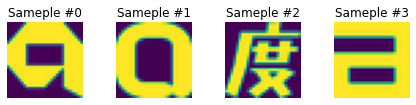

In [53]:
fig = plt.figure()

for i in range(8):
    sample = dataset[i]


    ax = plt.subplot(1,4, i+1)
    plt.tight_layout()
    ax.set_title("Sameple #{}".format(i))
    ax.axis('off')
    plt.imshow(sample[0])

    if i == 3:
        plt.show()
        break

In [58]:
import torch
from torchvision import transforms, datasets

data_transform = transforms.Compose([
    transforms.RandomSizedCrop(112),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
    ])

dataset = NotMNIST("data", download=False)

dataset_loader = torch.utils.data.DataLoader(dataset,
                                            batch_size=128, shuffle=True)

C:\Users\DAUNJEON\AppData\Local\Programs\Python\Python37\lib\site-packages\torchvision\transforms\transforms.py:935: UserWarning: The use of the transforms.RandomSizedCrop transform is deprecated, please use transforms.RandomResizedCrop instead.
  warnings.warn("The use of the transforms.RandomSizedCrop transform is deprecated, " +


['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']


In [59]:
train_features, train_labels = next(iter(dataset_loader))

In [60]:
train_features.shape

torch.Size([128, 28, 28])

In [61]:
train_features

tensor([[[  0,   0,   0,  ...,  53, 146, 101],
         [  0,   0,   0,  ..., 253, 255,  89],
         [  0,   2,   0,  ..., 255, 220,  11],
         ...,
         [  2,   0,  14,  ...,   0,   0,   0],
         [  0,  71, 229,  ...,   0,   0,   0],
         [ 58, 240, 236,  ...,   0,   0,   0]],

        [[255, 255, 255,  ...,   0,   2,   0],
         [185, 210, 235,  ...,   0,   2,   0],
         [  0,   4,  20,  ...,   0,   2,   0],
         ...,
         [  0,   0,  10,  ..., 255, 243,  44],
         [181, 198, 216,  ..., 255, 227,   9],
         [255, 255, 255,  ..., 255, 192,   0]],

        [[  0,   0,   0,  ...,   0,   3,   0],
         [  0,   0,   0,  ...,  35,   0,   2],
         [  0,   0,   0,  ..., 224,  25,   0],
         ...,
         [  0,   0,   0,  ...,   1,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        ...,

        [[  0,   0,   0,  ...,   2,   0,   0],
         [  0,   0,   0,  ...,   0,   1,   1]

In [62]:
train_labels

('F',
 'E',
 'G',
 'E',
 'G',
 'I',
 'A',
 'B',
 'I',
 'H',
 'A',
 'D',
 'F',
 'D',
 'D',
 'E',
 'I',
 'A',
 'D',
 'F',
 'J',
 'C',
 'C',
 'E',
 'E',
 'E',
 'D',
 'H',
 'A',
 'J',
 'D',
 'A',
 'E',
 'G',
 'B',
 'J',
 'B',
 'E',
 'I',
 'I',
 'D',
 'H',
 'I',
 'B',
 'I',
 'C',
 'A',
 'G',
 'I',
 'F',
 'J',
 'C',
 'G',
 'J',
 'G',
 'A',
 'C',
 'F',
 'H',
 'A',
 'J',
 'D',
 'D',
 'B',
 'H',
 'D',
 'B',
 'B',
 'C',
 'B',
 'E',
 'F',
 'F',
 'E',
 'C',
 'G',
 'I',
 'B',
 'B',
 'E',
 'D',
 'E',
 'B',
 'B',
 'E',
 'D',
 'D',
 'F',
 'B',
 'F',
 'A',
 'I',
 'C',
 'J',
 'G',
 'H',
 'E',
 'B',
 'E',
 'F',
 'E',
 'B',
 'G',
 'E',
 'A',
 'D',
 'H',
 'C',
 'B',
 'G',
 'C',
 'B',
 'B',
 'G',
 'I',
 'I',
 'A',
 'J',
 'I',
 'H',
 'E',
 'B',
 'J',
 'J',
 'H',
 'D',
 'B',
 'F')